### Impermanent Loss Research
#### Objective: determine risk thresholds between HODL vs LP staking
* https://pintail.medium.com/uniswap-a-good-deal-for-liquidity-providers-104c0b6816f2
    * Original introductory article (Pintail) on impermanent loss
* https://pintail.medium.com/understanding-uniswap-returns-cc593f3499ef
    * Pintail redefines as divergent loss 
* https://chainbulletin.com/impermanent-loss-explained-with-examples-math
    * Impermanent Loss Explained With Examples & Math
* https://medium.com/auditless/how-to-calculate-impermanent-loss-full-derivation-803e8b2497b7
    * How to calculate Impermanent Loss: full derivation 
* https://lambert-guillaume.medium.com/an-analysis-of-the-expected-value-of-the-impermanent-loss-in-uniswap-bfbfebbefed2
    * Calculating the Expected Value of the Impermanent Loss in Uniswap
* https://arxiv.org/pdf/2106.14404.pdf
    * UNISWAP: Impermanent Loss and Risk Profile of a Liquidity Provider
* https://medium.com/gammaswap-labs/expected-impermanent-loss-in-uniswap-v2-v3-7fb81033bd81
    * Expected Impermanent Loss in Uniswap V2 & V3
* https://medium.com/@danielalcarraz_42353/total-returns-and-impermanent-loss-in-uniswap-v2-9f3d5b6ebc89
    * Total Returns and Impermanent Loss in Uniswap V2

In [1]:
from IPython.display import Image
import os
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt
cwd =  os.getcwd().replace("notebooks/research/impermanent_loss","")
os.chdir(cwd)

### Uniswap V2: Impermanent Loss 

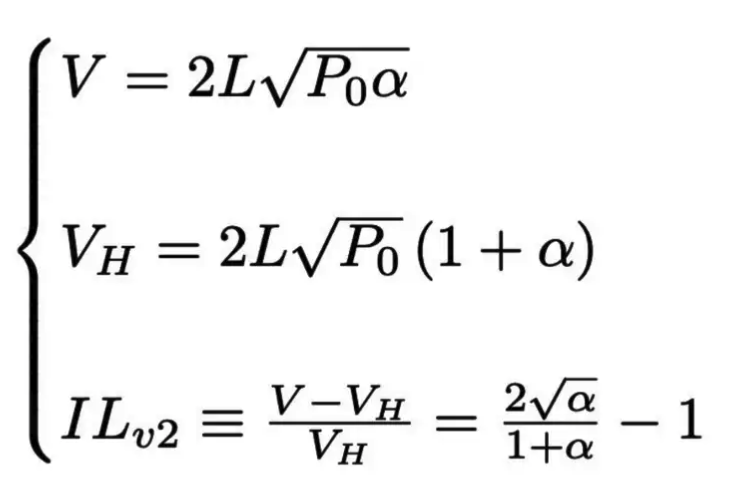

In [2]:
Image("images/jupyter/impermanent_loss/v2_impermant_loss.png", width = 400, height = 400)

where
* $V$ -> portfolio value
* $V_{H}$ -> holding portfolio value
* $IL_{v2}$ -> Uniswap v2 impermanent loss 
* $\alpha$ -> price ratio (ie, $\frac{price_{i}}{price_{f}}$)
* $L$ -> liquidity (ie, $xy = L^{2}$)
* $P_{0}$ -> initial price

### Uniswap V3: Impermanent Loss 

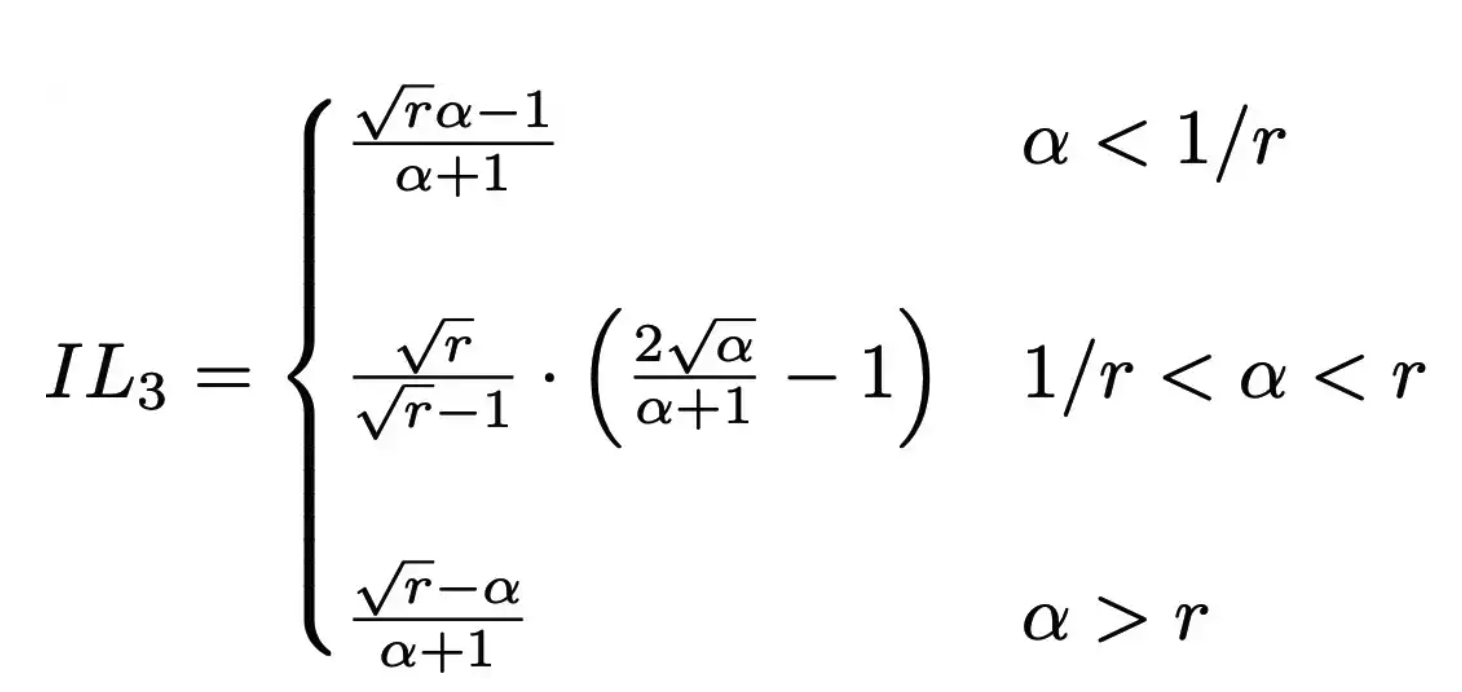

In [3]:
Image("images/jupyter/impermanent_loss/v3_impermant_loss.png", width = 400, height = 400)

where
* $IL_{v3}$ -> Uniswap v3 impermanent loss 
* $\alpha$ -> price ratio (ie, $\frac{price_{i}}{price_{f}}$)
* $r$ -> range factor (ie, $\sqrt{\frac{t_{H}}{t_{L}}}$)

Can goto [here](https://www.desmos.com/calculator/dmnrp2jde7) for plots

### Uniswap V2: Expected Impermanent Loss 

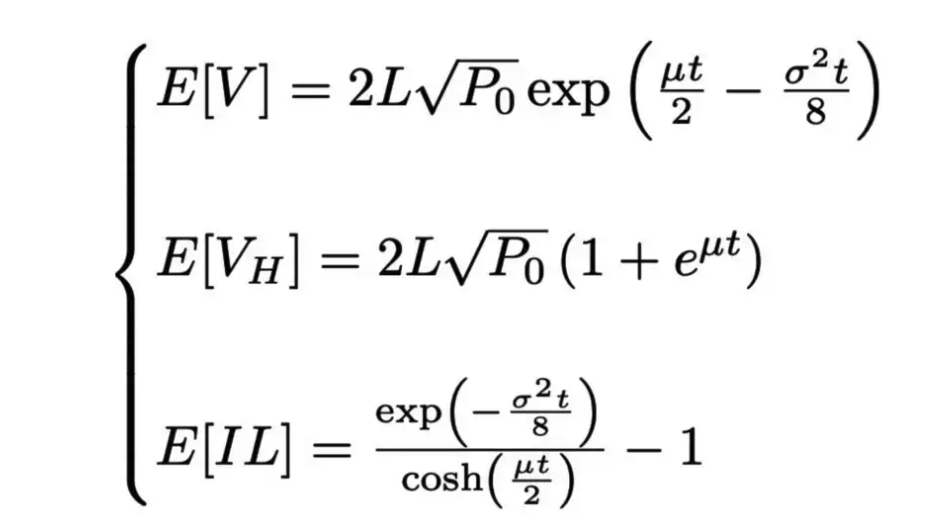

In [4]:
Image("images/jupyter/impermanent_loss/v2_expected.png", width = 400, height = 400)

where
* $V$ -> portfolio value
* $V_{H}$ -> holding portfolio value
* $IL$ -> Uniswap v2 impermanent loss
* $L$ -> liquidity (ie, $xy = L^{2}$)
* $P_{0}$ -> initial price
* $\mu$ -> price mean 
* $\sigma^2$ -> price variance
* $t$ -> time

### Uniswap V2: Expected Portfolio Value with Compounding Fees

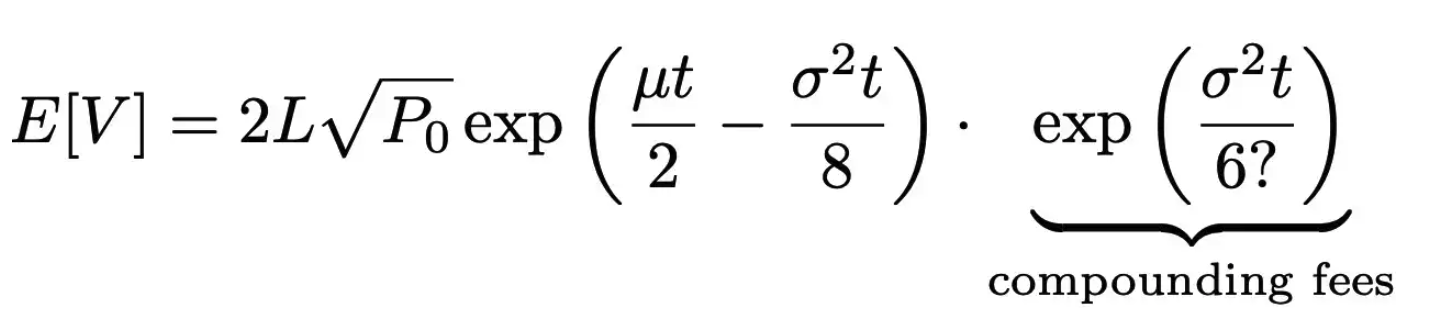

In [5]:
Image("images/jupyter/impermanent_loss/v2_expected_with_fees.png", width = 400, height = 400)

where
* $V$ -> portfolio value
* $P_{0}$ -> initial price
* $L$ -> liquidity (ie, $xy = L^{2}$)
* $\mu$ -> price mean 
* $\sigma^2$ -> price variance
* $t$ -> time

Assuming Geometric Brownian Motion (GBM) for price asset

### Uniswap V2: Expected LP Returns

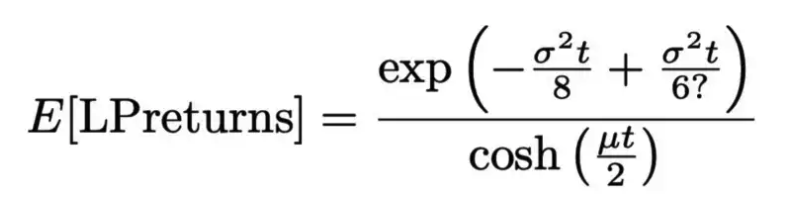

In [6]:
Image("images/jupyter/impermanent_loss/v2_expected_returns.png", width = 400, height = 400)

where
* $\mu$ -> price mean 
* $\sigma^2$ -> price variance
* $t$ -> time

Assuming Geometric Brownian Motion (GBM) for price asset

### Plot Impermanent Loss (Uniswap v2)

In [7]:
alpha = np.arange(0, 5, 0.1)
IL = (2*np.sqrt(alpha))/(1+alpha) - 1

In [8]:
0.45**2

0.2025

In [9]:
 (2*np.sqrt(2))/(1+2) - 1

-0.05719095841793653

In [41]:
alpha

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [40]:
IL

array([-1.        , -0.42504043, -0.25464401, -0.15734991, -0.0964921 ,
       -0.05719096, -0.03175416, -0.01569409, -0.00619201, -0.001386  ,
        0.        , -0.00113443, -0.0041408 , -0.00854311, -0.0139867 ,
       -0.0202041 , -0.02699149, -0.03419224, -0.04168515, -0.04937595,
       -0.05719096, -0.06507247, -0.07297519, -0.08086358, -0.0887098 ,
       -0.0964921 , -0.10419358, -0.11180126, -0.11930524, -0.12669814,
       -0.1339746 , -0.14113088, -0.14816458, -0.15507432, -0.16185959,
       -0.16852058, -0.175058  , -0.18147302, -0.18776714, -0.19394214,
       -0.2       , -0.20594287, -0.21177302, -0.21749278, -0.22310456,
       -0.22861078, -0.23401391, -0.23931637, -0.24452061, -0.24962903])

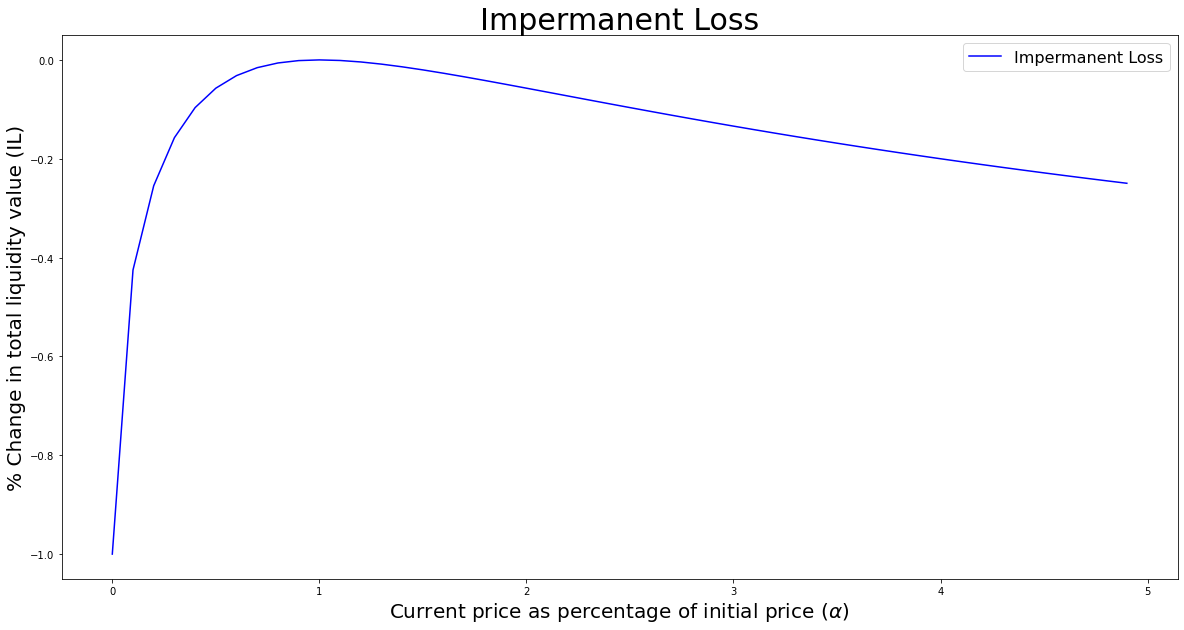

In [10]:
fig, ax = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(20, 10))
ax.plot(alpha, IL, color = 'b', label = 'Impermanent Loss')
ax.set_title('Impermanent Loss', fontsize=30)
ax.set_ylabel('% Change in total liquidity value (IL)', fontsize=20)
ax.set_xlabel('Current price as percentage of initial price ($\u03B1$)', fontsize=20)
ax.legend(fontsize=16, loc='upper right')

Text(0.5, 1.0, 'Impermanent Loss')

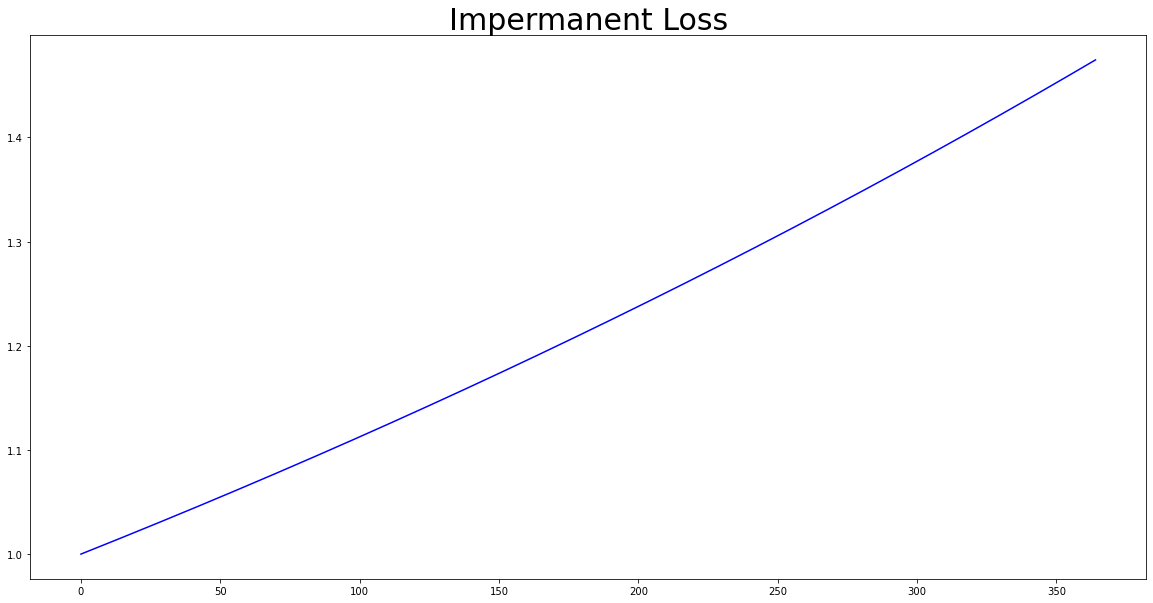

In [11]:
t = np.arange(0, 365, 1)
trading = np.exp(((0.08)**2*t)/6)

fig, ax = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(20, 10))
ax.plot(t, trading, color = 'b', label = 'Impermanent Loss')
ax.set_title('Impermanent Loss', fontsize=30)


### Expected Impermanent Loss

In [12]:
(1.5)**2/6

0.375

In [13]:
np.exp((1.5)**2/6)

1.4549914146182013

In [14]:
(1)**2/6

0.16666666666666666

In [15]:
np.exp((1.5)**2/6)

1.4549914146182013

In [28]:
1/12

0.08333333333333333

In [33]:
np.exp(((1)**2)*1/8.5)

1.1248470364630236

In [42]:
np.cosh(0)

1.0

In [17]:
import numpy as np 
ALPHA = 0.5

def trading_fees(alpha, sigma, t):
    return t*alpha

def imp_loss_v2(per_mu, per_sigma, t, alpha):
    mu = 1*per_mu
    sigma = per_sigma
    return np.exp(-t*(sigma**2)/8 + trading_fees(alpha, sigma, t))/np.cosh(mu*t/2) - 1

In [46]:
imp_loss_mu2[-1]

-0.11318111602992598

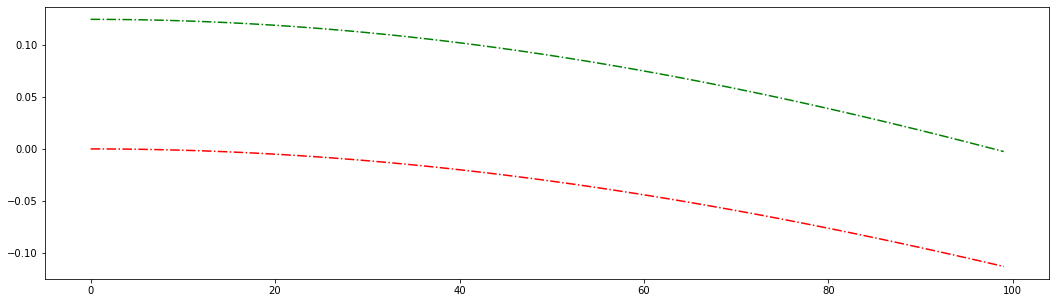

In [45]:
mu = np.linspace(0, 1, 100)

imp_loss_mu = imp_loss_v2(mu, 0.025, 1, 1/8.5)
imp_loss_mu2 = imp_loss_v2(mu, 0, 1, 0)

fig, (il_ax) = plt.subplots(nrows=1, sharex=False, sharey=False, figsize=(18, 5))
il_ax.plot(imp_loss_mu, color = 'g',linestyle = 'dashdot', label='initial invest') 
il_ax.plot(imp_loss_mu2, color = 'r',linestyle = 'dashdot', label='initial invest') 


In [18]:
mu = np.linspace(0, 1, 200)
sigma = np.linspace(0, 1, 200)

SIG, MU  = np.meshgrid(sigma, mu)  
   
Z_accuracy = MU.copy().astype(np.float32) 
Z_accuracy2 = MU.copy().astype(np.float32) 
Z_accuracy3 = MU.copy().astype(np.float32) 

for i in range(len(mu)):  
    for j in range(len(sigma)):  
        Z_accuracy[j][i] = imp_loss_v2(sigma[j], mu[i], 1, 0.16) 
        Z_accuracy2[j][i] = imp_loss_v2(sigma[j], mu[i], 1, 0.375)
        Z_accuracy3[j][i] = imp_loss_v2(sigma[j], mu[i], 1, 0)

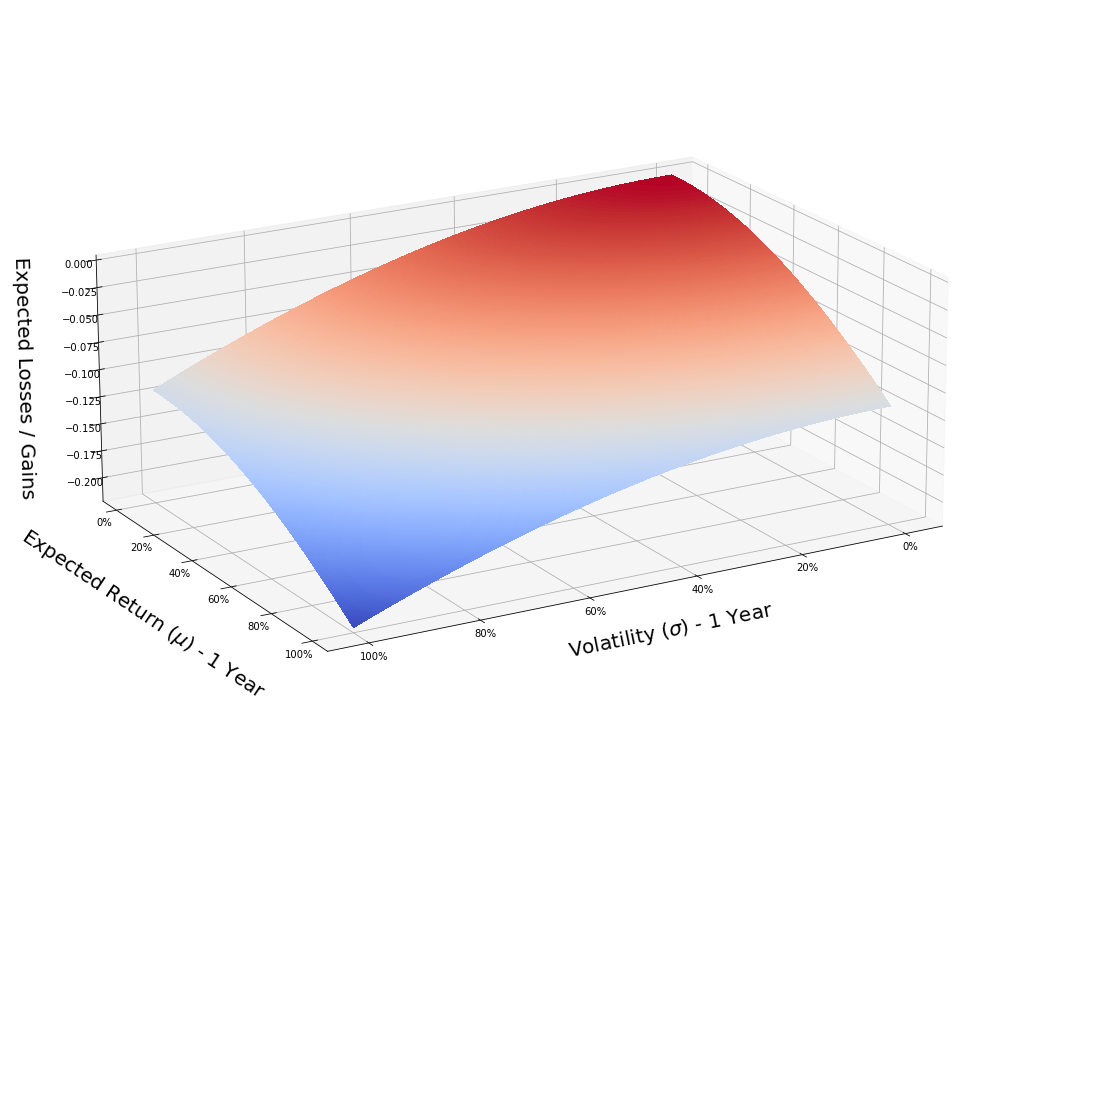

In [19]:
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data  
from matplotlib import cm   
import numpy as np   
import random  
import matplotlib.ticker as mtick


fig = plt.figure(figsize=(20, 20))  
ax = fig.add_subplot(1, 1, 1, projection='3d')   

surf = ax.plot_surface(SIG, MU, Z_accuracy3,   
    rstride=1, cstride=1, cmap=cm.coolwarm,  
    linewidth=0, antialiased=False)  

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter((mtick.PercentFormatter(1)))  
 
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 0.7, 0.5, 1]))  
ax.set_xlabel('Volatility ($\sigma$) - 1 Year', fontsize=20, labelpad=40)  
ax.set_ylabel('Expected Return ($\mu$) - 1 Year', fontsize=20, labelpad=40)  
ax.set_zlabel('Expected Losses / Gains', fontsize=20, labelpad=30)  
ax.view_init(20, 60)
plt.show() 

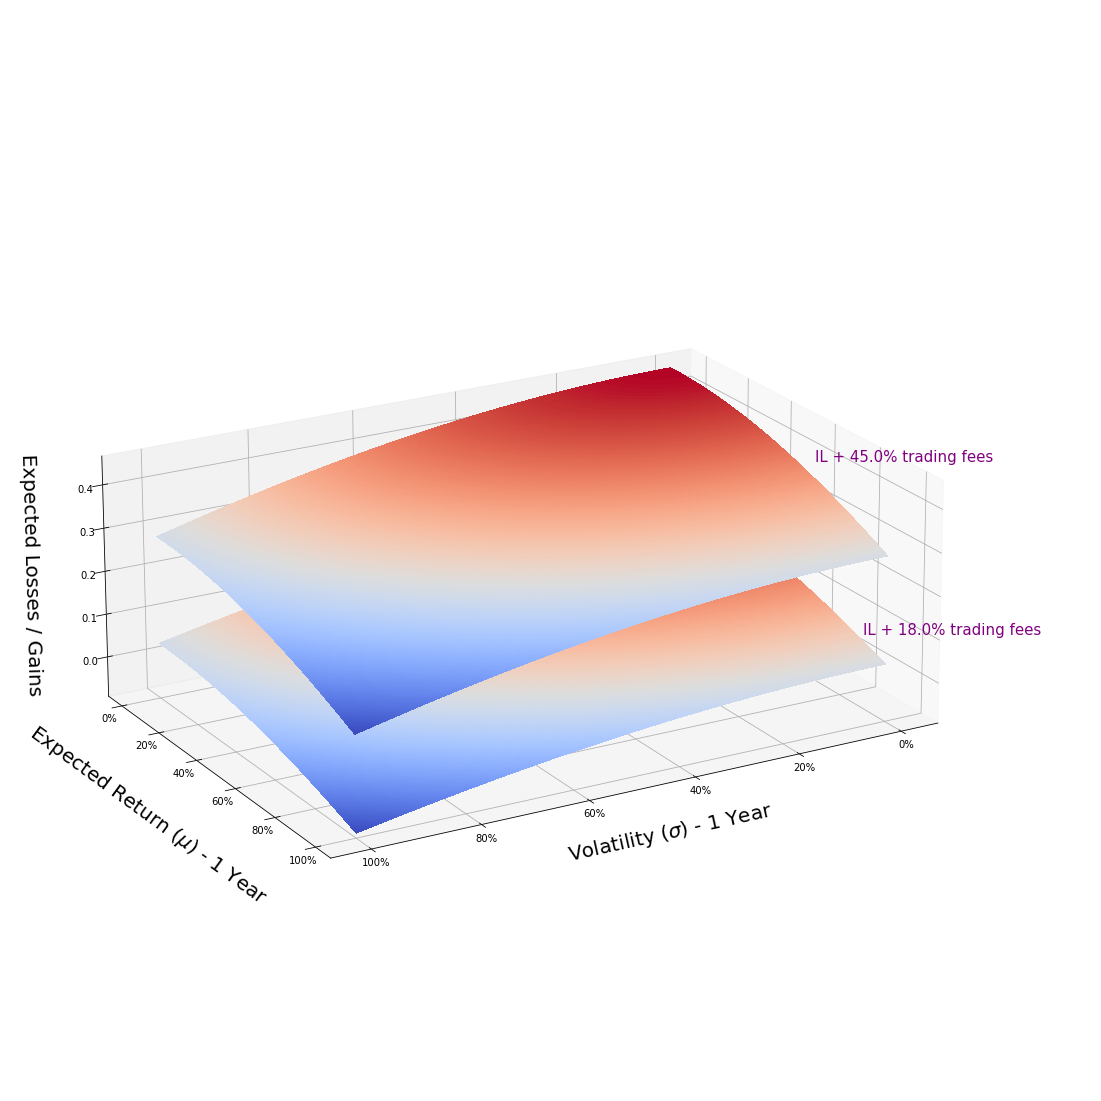

In [20]:
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data  
from matplotlib import cm   
import numpy as np   
import random  
import matplotlib.ticker as mtick

mu = np.linspace(0, 1, 200)
sigma = np.linspace(0, 1, 200)

fig = plt.figure(figsize=(20, 20))  
ax = fig.add_subplot(1, 1, 1, projection='3d')   

surf = ax.plot_surface(SIG, MU, Z_accuracy,   
    rstride=1, cstride=1, cmap=cm.coolwarm,  
    linewidth=0, antialiased=False)  

surf = ax.plot_surface(SIG, MU, Z_accuracy2,   
    rstride=1, cstride=1, cmap=cm.coolwarm,  
    linewidth=0, antialiased=False)  

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_major_formatter((mtick.PercentFormatter(1)))  

ax.text(0.1,0.9,0.5,  'IL + {:.1f}% trading fees'.format(45), size=15, zorder=1, color='purple') 
ax.text(0,0.9,0.08,  'IL + {:.1f}% trading fees'.format(18), size=15, zorder=1, color='purple')   
    
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 0.7, 0.5, 1]))  
ax.set_xlabel('Volatility ($\sigma$) - 1 Year', fontsize=20, labelpad=40)  
ax.set_ylabel('Expected Return ($\mu$) - 1 Year', fontsize=20, labelpad=40)  
ax.set_zlabel('Expected Losses / Gains', fontsize=20, labelpad=30)  
ax.view_init(20, 60)
plt.show() 
